<a href="https://colab.research.google.com/github/AhmedAkram392/Regularization/blob/main/Regularization_Lasso_Regression(L1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lasso Regression is very very similar to Ridge regression

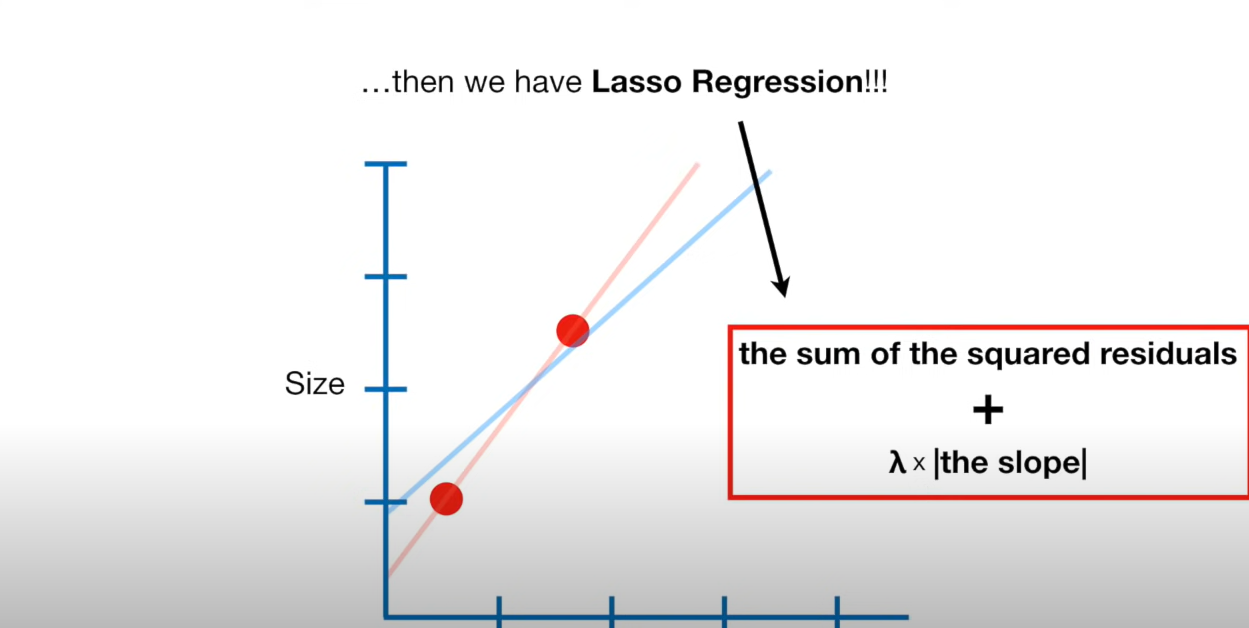

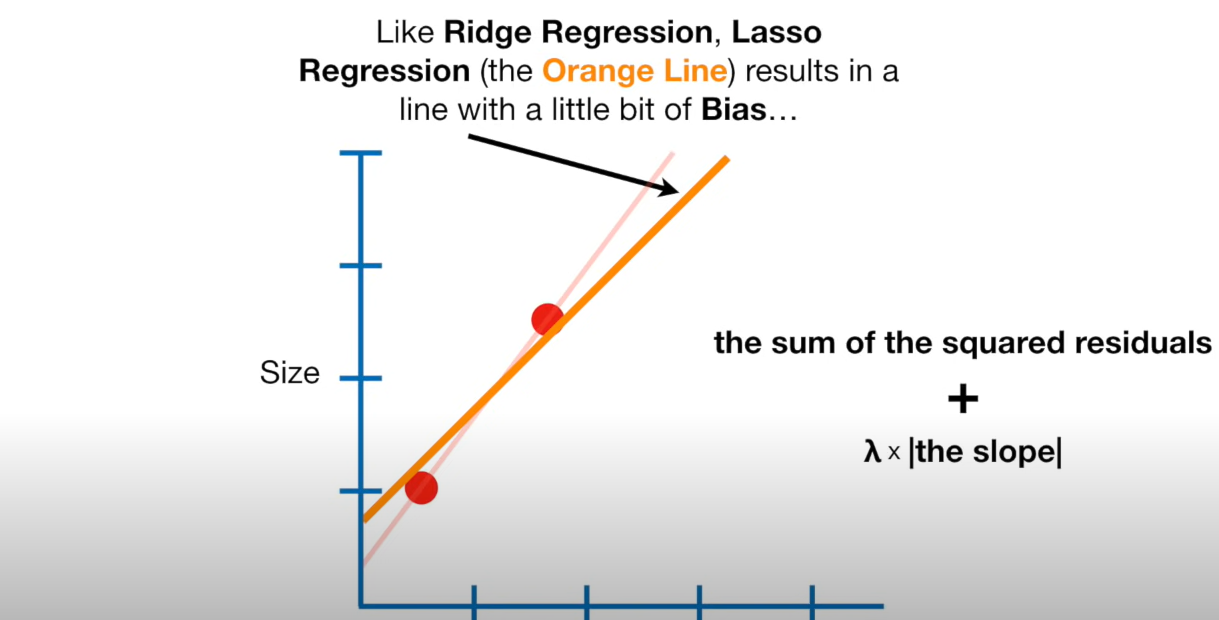

# Least Square VS Ridge Regression VS Lasso Regression

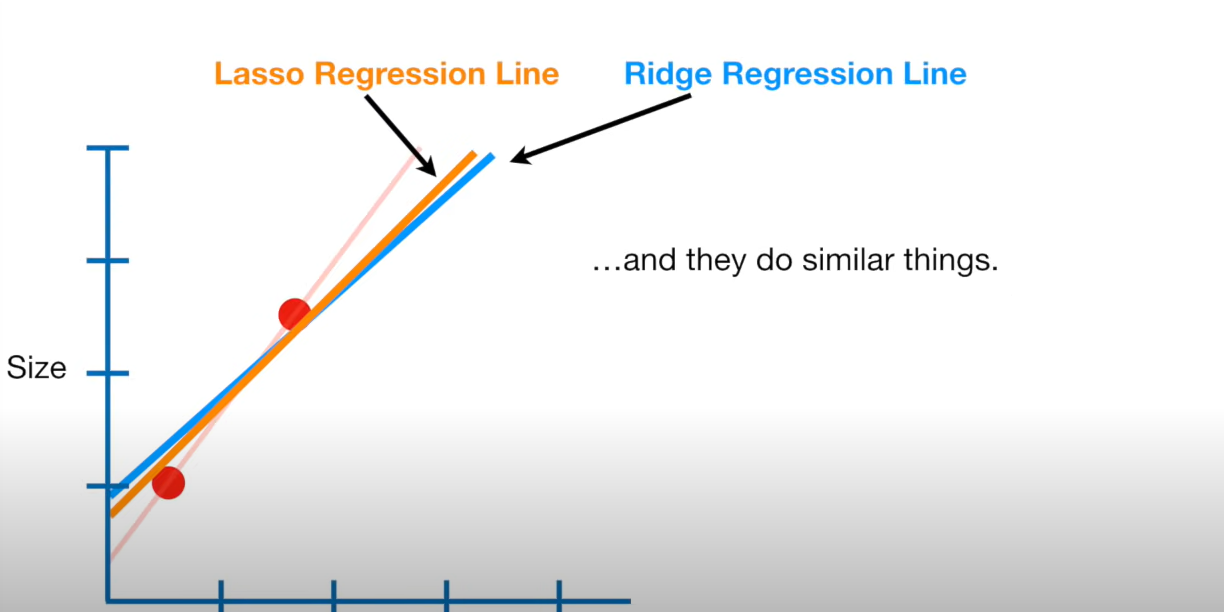

# The Actual Difference between Ridge Regression and Lasso Regression

The actual difference comes when we increase the value of lambda because if we increase the value of Lambda or alpha the m tends to increase if we incraese at higher extent in lasso regression it actually becomes zero

y= mx + b
y = b that y intercept

but in ridge regression it doesnot become zero actually, ridge regression can only shrink the slope asymptotically close to zero.

# What is asymptote or what does actually it means (asymptotically close to zero)

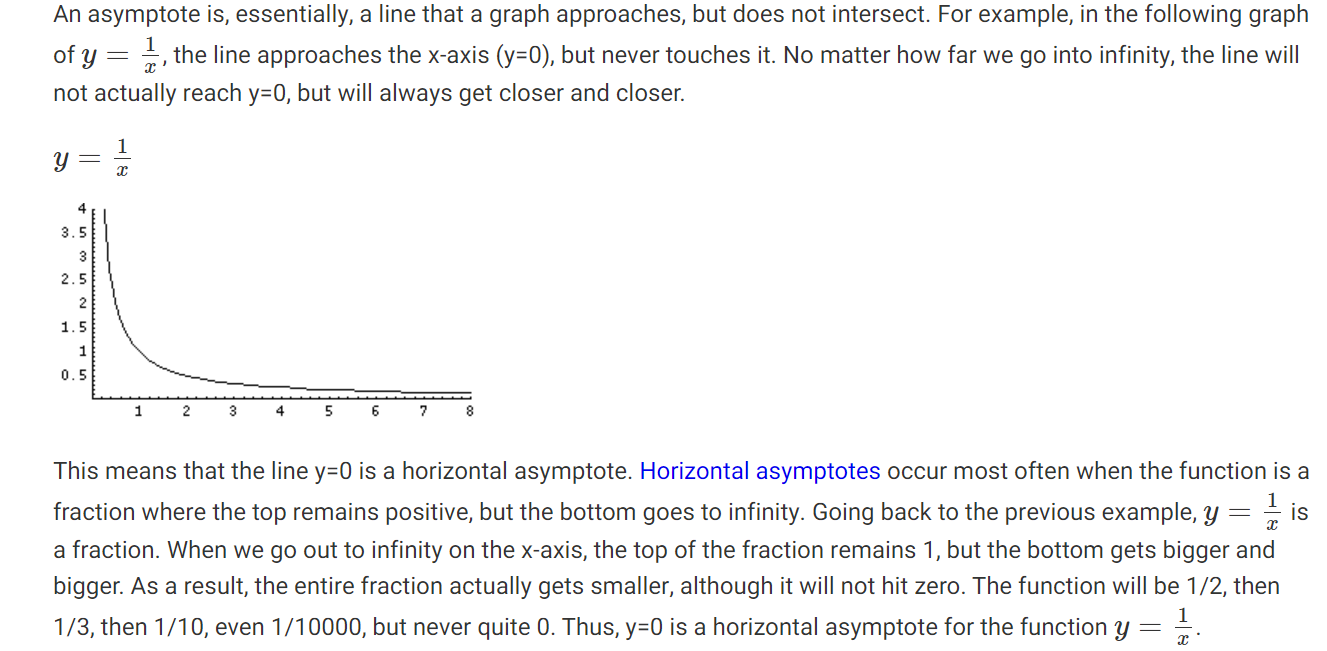

# The Actual benefit of Lasso Over Ridge in making coefficient Zero

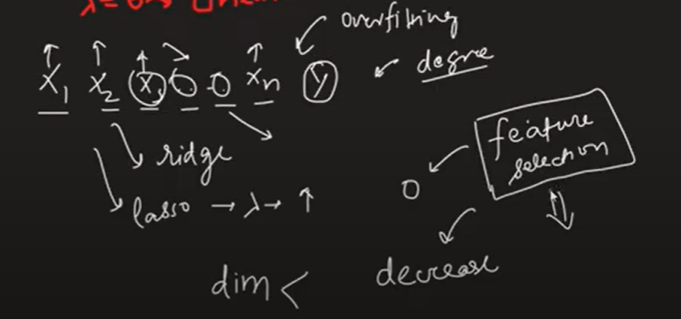

As  we can see above if we have high dimensional data like x1,x2,x3,x4...xn and y target variable if we apply the ridge regression on it will it will never make the slope or m or weights getting multiplied with features xn so it will keep all the features essential or non essential.

But if we apply the lasso regression and apply the lasso regresion it will actually make the some of the features zero (non essential ones) and will actually **decreasing the dimension** or **doing feature selection**.

Basically those features will be zero on which Y is no relying or depending.


Noted:

So lasso is doing feature selection inherently and it is highly recommended to apply lasso over High dimensional data.

# What Happened with the slope as we increase the value of Lambda or alpha?

As we increase the value of lambda the overfitting decreases, so basically we are increasing the bias and reducing the variation

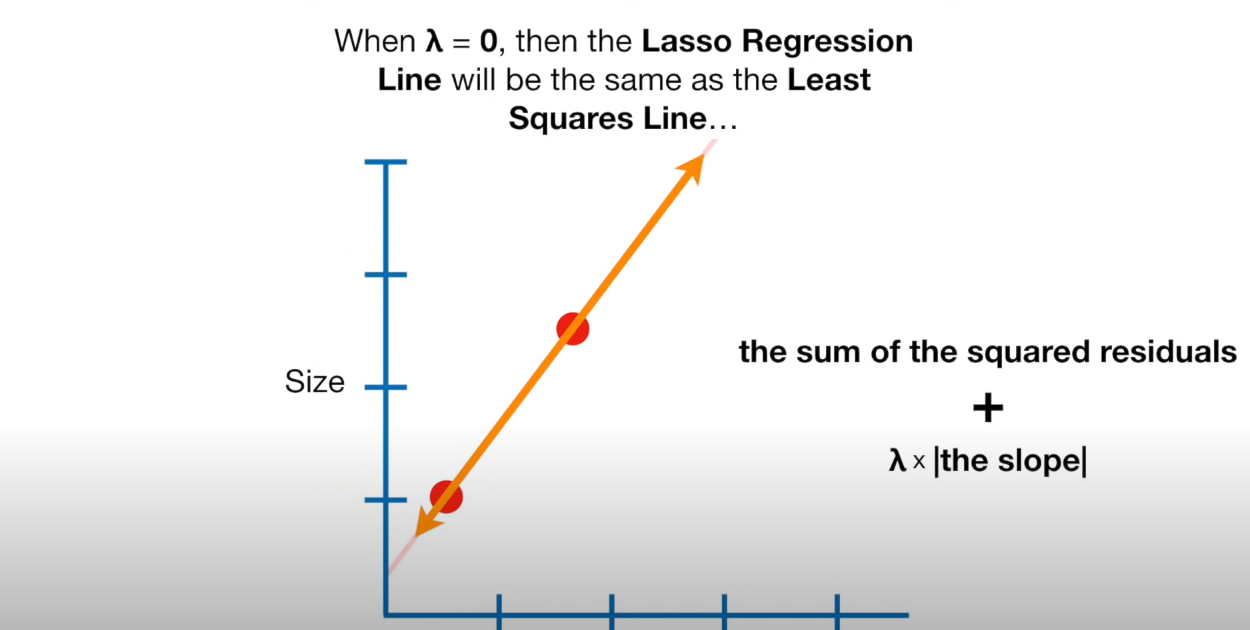

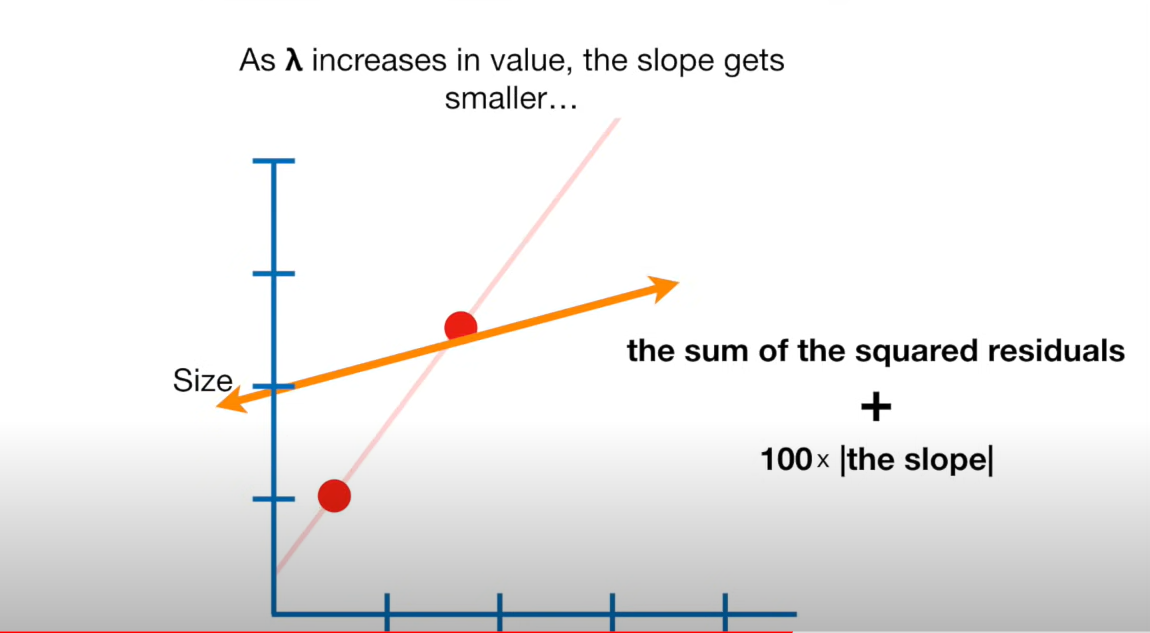

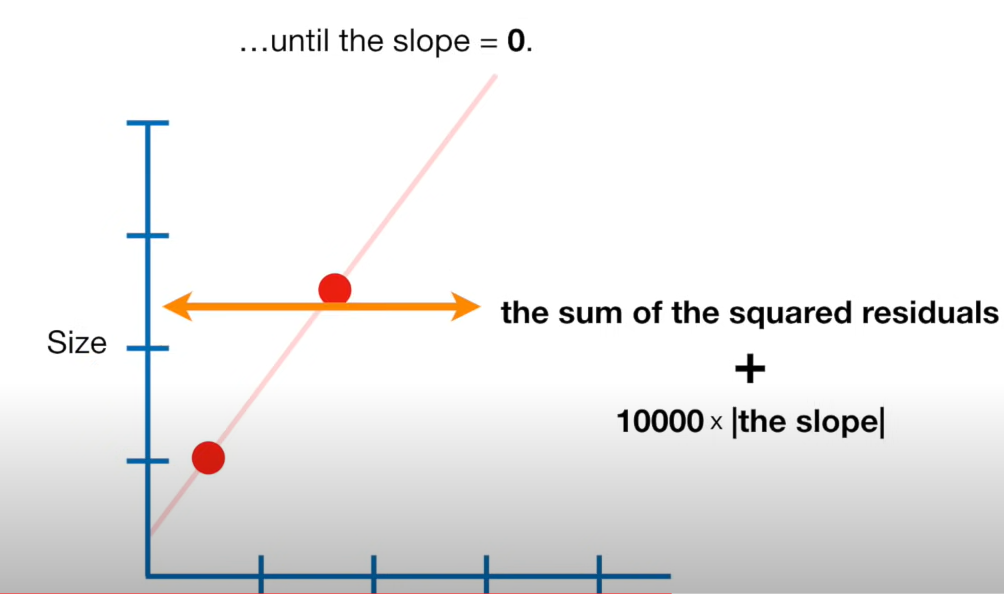

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[28.16138503]
-1.1496037704858761


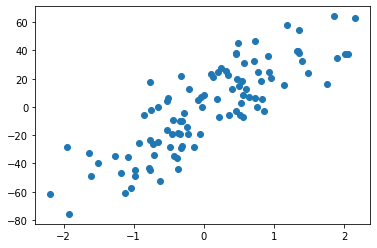

In [2]:
#Make Regression will actually create the data sample for regression problem, 
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+04, tolerance: 7.599e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

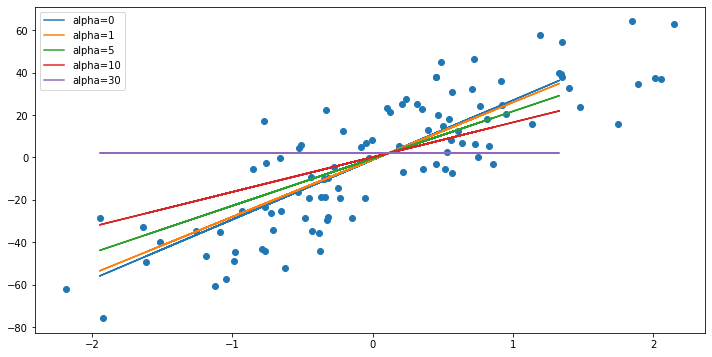

In [3]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

# Here we are going to generate the non linear data then will generate the ploynmial features or polynomial Regression on the data and then apply Lasso regression on it

**Polynomial regression** is used when there is no linear correlation between the variables. Hence, it explains why it looks more like a non-linear function.


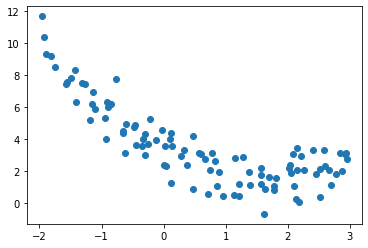

In [26]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Important Functions to understand here is Zip(),sorted(),np.argsort()

Zip() function will take two iterables objects and make a list of tuples, if two objects are given then it will pick one elemnt from one object and and one element from other oterable make one tuple then it goes on adding.

For Example:

a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")

output:
(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))

Sorted() function will aort the number in ascending order, if the arument will passed reverse =True it will generate the descending order


np.argsort() will generate the indexes in which the sorting will be done

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.151e+01, tolerance: 6.077e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coe

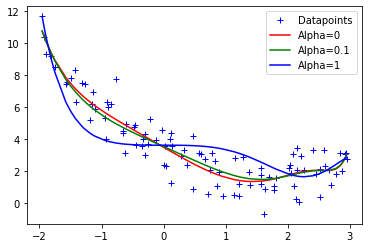

In [31]:
from sklearn.preprocessing import PolynomialFeatures

def get_preds_lasso(x1,x2,alpha):
  steps = [('poly',PolynomialFeatures(degree=16)),('lasso',Lasso(alpha=alpha))]
  model = Pipeline(steps)
  model.fit(x1,x2)
  return model.predict(x1)

alpha = [0,0.1,1]
cs =['r','g','b']
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha, c in zip(alpha,cs):
  preds = get_preds_lasso(x1,x2,alpha)
  #here asically we are creating the polynomial line as we got the values so first we sorted the x1 which is the feature then we passed the indexes in pred function they way x1 will be sorted
  plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label ='Alpha={}'.format(alpha))

plt.legend()
plt.show()


# Reference

StacOverflow, Youtube, Campus X